<a href="https://colab.research.google.com/github/JSJeong-me/Introduction-to-Data-Analysis-with-DL-and-ML/blob/main/3-DL/23-Keras-Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

Data Set Preparation

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("./data.csv")

In [ ]:
df.tail()

In [6]:
df.columns

Index(['SEX', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AVR',
       'BILL_AVR', 'AMT_AVR', 'UTIL', 'default.payment.next.month'],
      dtype='object')

In [7]:
X = df.drop(['default.payment.next.month'],axis =1).values
y = df['default.payment.next.month'].values

In [8]:
X[0]

array([ 2.00000000e+00,  2.00000000e+04,  2.00000000e+00,  1.00000000e+00,
        2.40000000e+01, -3.33333333e-01,  1.28400000e+03,  1.14833333e+02,
        6.42000000e-02])

In [9]:
X[-1]

array([1.00000000e+00, 5.00000000e+04, 2.00000000e+00, 1.00000000e+00,
       4.60000000e+01, 0.00000000e+00, 3.84790000e+04, 1.38466667e+03,
       7.69580000e-01])

In [10]:
y[-1]

1

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
len(X_test)

9000

In [13]:
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[-1]

array([ 0.80648893, -0.05504288,  0.18648797, -1.05381817,  0.05416417,
       -1.847642  , -0.65392199, -0.11985747, -0.98898473])

In [16]:
X_test[-1]

array([ 0.80648893,  0.64128415, -1.07681763, -1.05381817,  0.05416417,
       -1.847642  , -0.65301532, -0.03974819, -1.0119738 ])

In [17]:
len(X_train)

21000

In [18]:
input_param = X.shape[1]

In [19]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=512, input_shape=[input_param], activation='relu'),
    layers.Dense(units=1024, activation='relu'),
    layers.Dropout(0.2),
    # layers.BatchNormalization(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    # layers.BatchNormalization(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
])

In [20]:
# model.add(layers.Dense(units = 1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [22]:
#compile the model
model.compile(optimizer = 'adam' ,
             loss = 'binary_crossentropy',
             metrics =['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=100,shuffle = True, verbose =2)

Epoch 1/100
657/657 - 8s - loss: 0.4907 - accuracy: 0.7918 - 8s/epoch - 12ms/step
Epoch 2/100
657/657 - 3s - loss: 0.4643 - accuracy: 0.8007 - 3s/epoch - 4ms/step
Epoch 3/100
657/657 - 2s - loss: 0.4592 - accuracy: 0.8050 - 2s/epoch - 4ms/step
Epoch 4/100
657/657 - 2s - loss: 0.4581 - accuracy: 0.8018 - 2s/epoch - 4ms/step
Epoch 5/100
657/657 - 2s - loss: 0.4570 - accuracy: 0.8025 - 2s/epoch - 4ms/step
Epoch 6/100
657/657 - 2s - loss: 0.4550 - accuracy: 0.8018 - 2s/epoch - 4ms/step
Epoch 7/100
657/657 - 2s - loss: 0.4538 - accuracy: 0.8030 - 2s/epoch - 4ms/step
Epoch 8/100
657/657 - 2s - loss: 0.4540 - accuracy: 0.8024 - 2s/epoch - 4ms/step
Epoch 9/100
657/657 - 2s - loss: 0.4525 - accuracy: 0.8032 - 2s/epoch - 4ms/step
Epoch 10/100
657/657 - 2s - loss: 0.4512 - accuracy: 0.8030 - 2s/epoch - 4ms/step
Epoch 11/100
657/657 - 2s - loss: 0.4508 - accuracy: 0.8045 - 2s/epoch - 4ms/step
Epoch 12/100
657/657 - 2s - loss: 0.4504 - accuracy: 0.8029 - 2s/epoch - 4ms/step
Epoch 13/100
657/657 - 2

In [24]:
#quantify the model
model_loss, model_accuracy = model.evaluate(X_test,y_test,verbose =2)
print( model_loss )
print (model_accuracy)

282/282 - 1s - loss: 0.5745 - accuracy: 0.7804 - 626ms/epoch - 2ms/step
0.5745176076889038
0.7804444432258606


In [25]:
from sklearn.metrics import recall_score

In [26]:
y_prediction = model.predict(X_test)

282/282 [==============================] - 1s 2ms/step


In [27]:
y_prediction[:3]

array([[0.22209647],
       [0.00252762],
       [0.10648771]], dtype=float32)

In [28]:
predictions = np.rint(y_prediction)

In [29]:
print("Recall score:"+ str(recall_score(y_test, predictions)))

Recall score:0.3576530612244898


In [30]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6323  717]
 [1259  701]]


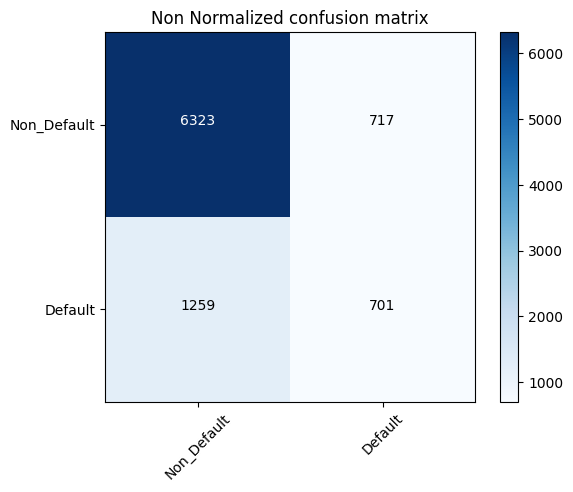

In [32]:
cnf_matrix = confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')